In [62]:
import pandas as pd
import numpy as np
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [4]:
data = pd.read_csv ('data_glass.txt', sep=',', names = ['ID','RI','NA2O','MGO','AL2O3','SIO2','K2O','CAO','BAO','FE2O3','TYPE'])
print(data.shape)
data.head()

(214, 11)


,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [12]:
X_col = [col for col in data.columns if col != 'TYPE' and col != 'ID']
X = data[X_col]
y = data['TYPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [26]:
n_n = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50]
scores = []
for n_ in n_n:
    neigh = KNeighborsClassifier(n_neighbors=n_)
    neigh.fit(X_train, y_train)
    pred = neigh.predict_proba(X_test)
    scores.append(log_loss(y_test, pred))

In [28]:
min(scores)

0.8777114127007059

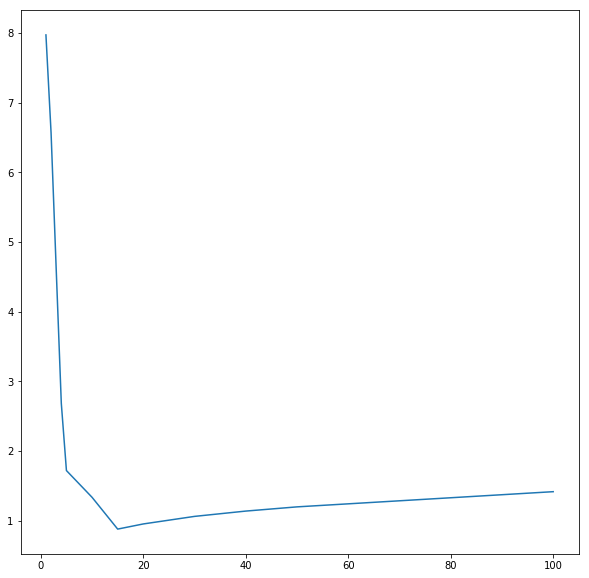

In [25]:
plt.figure(figsize = (10, 10))
plt.plot(n_n, scores)
plt.show()

In [65]:
n_n = [1, 2, 3, 4, 5, 10]
scores = []
for n_ in n_n:
    clf = DecisionTreeClassifier(max_depth=n_)
    clf.fit(X_train, y_train)
    pred = clf.predict_proba(X_test)
    scores.append(log_loss(y_test, pred))

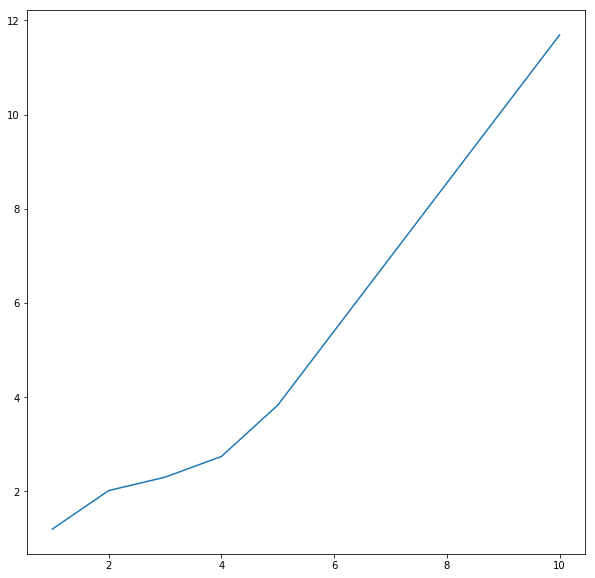

In [66]:
plt.figure(figsize = (10, 10))
plt.plot(n_n, scores)
plt.show()